<a href="https://colab.research.google.com/github/yuvalBerghaus/computer_vision/blob/main/ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

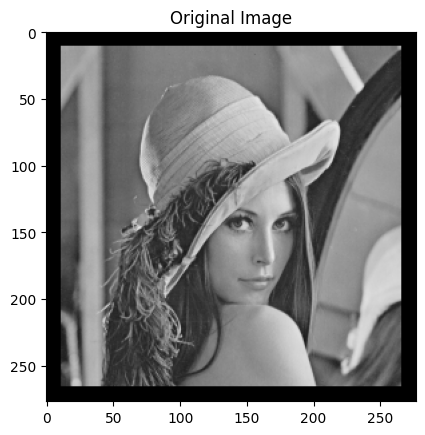

Blurred image saved successfully: blurred_image_sigma_1.5.png


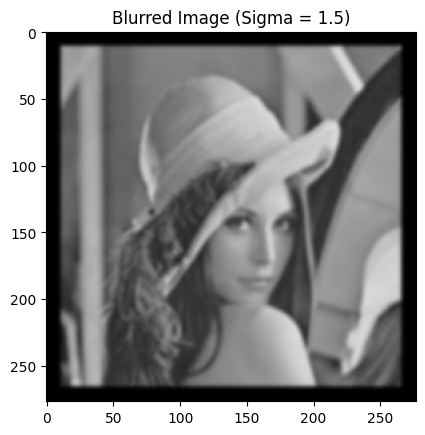

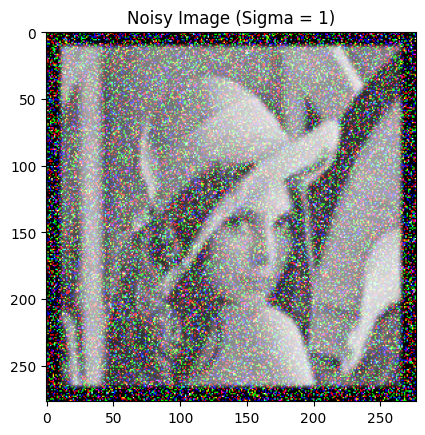

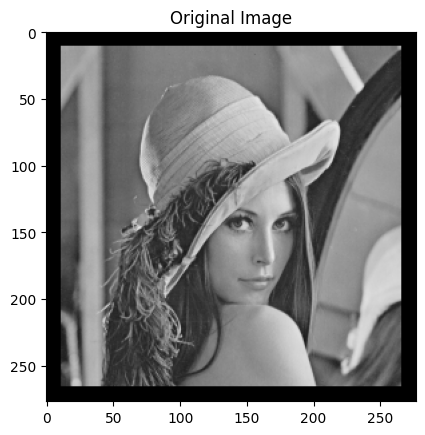

Blurred image saved successfully: blurred_image_sigma_1.5.png


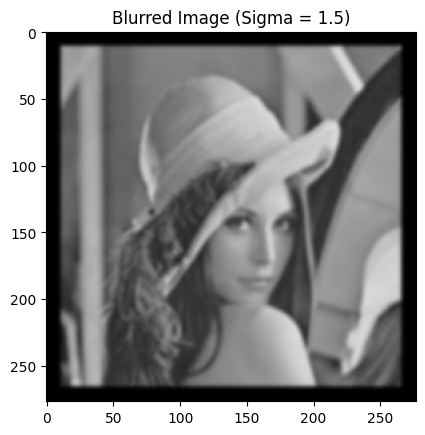

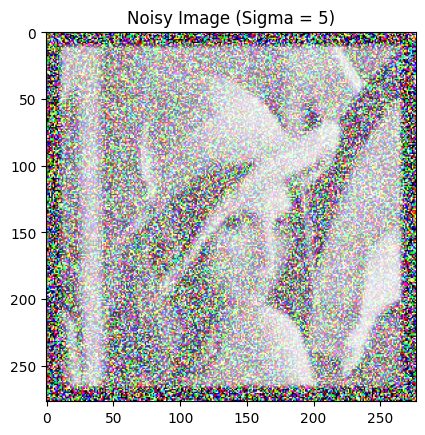

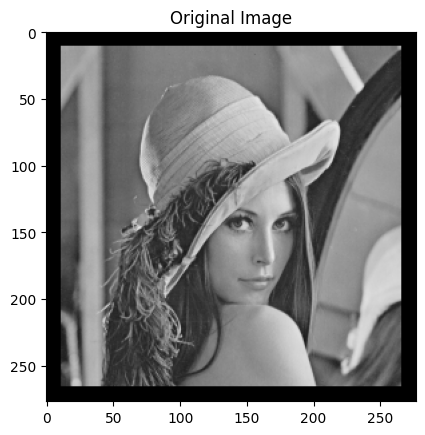

Blurred image saved successfully: blurred_image_sigma_1.5.png


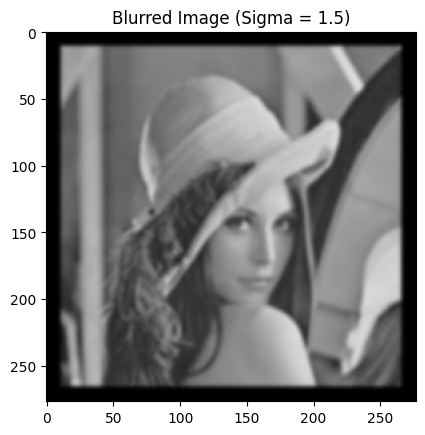

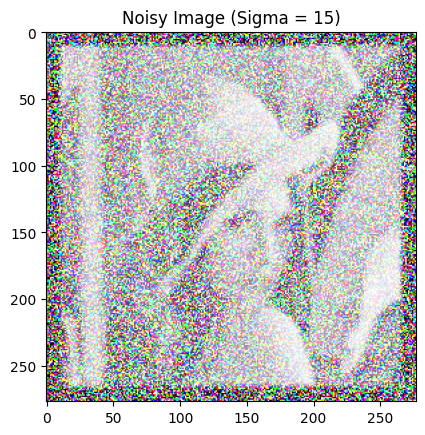

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image, sigma):
    noisy_image = image.copy()
    noise = np.random.normal(0, sigma, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

sigma_values = [1, 5, 15]
noisy_images = []

for sigma in sigma_values:
    # Read and display the original image
    image_path = 'lena.png'
    image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    plt.title('Original Image')
    plt.show()

    # Apply Gaussian blur to the image
    sigma_blur = 1.5
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma_blur)
    blurred_rgb_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

    # Save the blurred image
    blurred_image_path = f'blurred_image_sigma_{sigma_blur}.png'
    cv2.imwrite(blurred_image_path, blurred_image)
    print(f"Blurred image saved successfully: {blurred_image_path}")

    plt.imshow(blurred_rgb_image)
    plt.title(f'Blurred Image (Sigma = {sigma_blur})')
    plt.show()

    # Add Gaussian noise to the blurred image
    noisy_img = add_gaussian_noise(blurred_image, sigma)
    noisy_img_rgb = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)
    noisy_images.append(noisy_img)

    plt.imshow(noisy_img_rgb)
    plt.title(f'Noisy Image (Sigma = {sigma})')
    plt.show()


In [ ]:
import cv2
import numpy as np
from scipy.signal import wiener

def apply_wiener_filter(image, k):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    restored_image = wiener(grayscale_image, (3, 3), noise=k)
    restored_image = cv2.cvtColor(restored_image.astype(np.uint8), cv2.COLOR_GRAY2BGR)
    return restored_image

k_values = np.arange(0.1, 0.15, 0.005)
restored_images = []

for noisy_image in noisy_images:
    restored_images_list = []

    for k in k_values:
        restored_image = apply_wiener_filter(noisy_image, k)
        restored_images_list.append(restored_image)

    restored_images.append(restored_images_list)


/usr/local/lib/python3.10/dist-packages/scipy/signal/_signaltools.py:1629: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.10/dist-packages/scipy/signal/_signaltools.py:1629: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


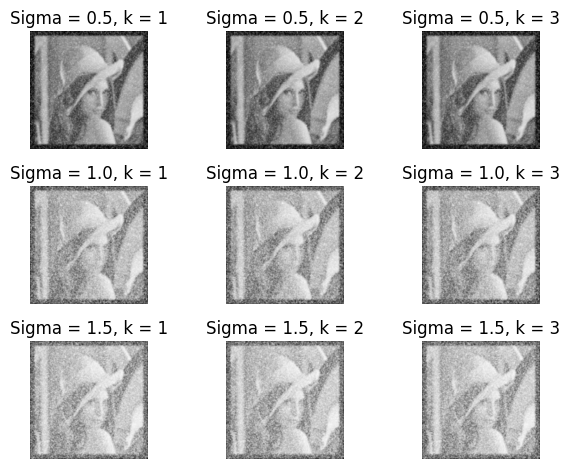

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

for i, sigma in enumerate(sigma_values):
    for j, k in enumerate(k_values):
        plt.subplot(len(sigma_values), len(k_values), i * len(k_values) + j + 1)
        restored_image_rgb = cv2.cvtColor(restored_images[i][j], cv2.COLOR_BGR2RGB)
        plt.imshow(restored_image_rgb)
        plt.title(f'Sigma = {sigma}, k = {k}')
        plt.axis('off')

plt.tight_layout()
plt.show()


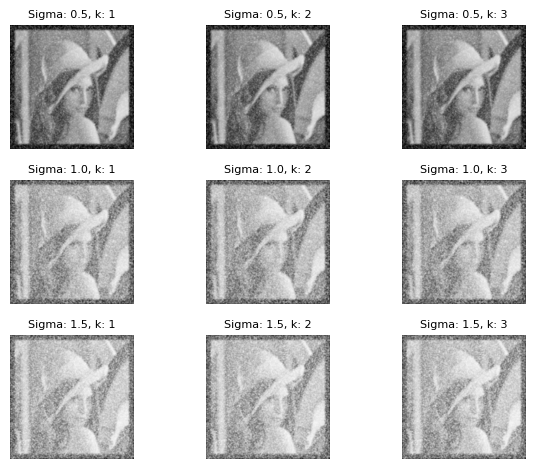

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Specify the sigma and k values
sigma_values = [0.5, 1.0, 1.5]
k_values = [1, 2, 3]

# Display the restored images with corresponding labels
for i, sigma in enumerate(sigma_values):
    for j, k in enumerate(k_values):
        plt.subplot(len(sigma_values), len(k_values), i * len(k_values) + j + 1)
        restored_image_rgb = cv2.cvtColor(restored_images[i][j], cv2.COLOR_BGR2RGB)
        plt.imshow(restored_image_rgb)
        plt.title(f'Sigma: {sigma}, k: {k}', fontsize=8)
        plt.axis('off')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/signal/_signaltools.py:1629: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.10/dist-packages/scipy/signal/_signaltools.py:1629: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


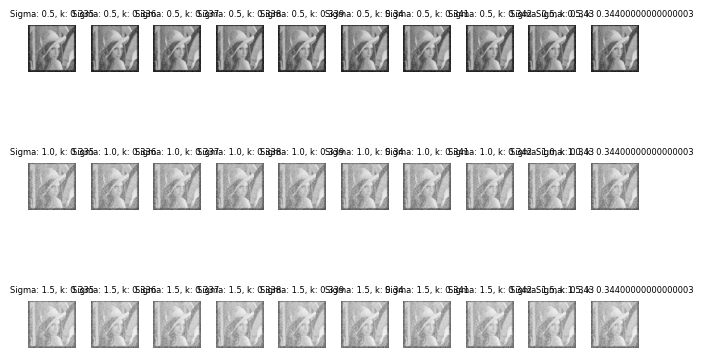

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Specify the k values
k_values = np.arange(0.335, 0.345, 0.001)
restored_images = []
for noisy_img in noisy_images:
    restored_img_list = []
    for k in k_values:
        restored_img = apply_wiener_filter(noisy_img, k)
        restored_img_list.append(restored_img)
    restored_images.append(restored_img_list)

# Display the restored images with corresponding labels
for i in range(len(sigma_values)):
    for j in range(len(k_values)):
        plt.subplot(len(sigma_values), len(k_values), i * len(k_values) + j + 1)
        plt.imshow(cv2.cvtColor(restored_images[i][j], cv2.COLOR_BGR2RGB))
        plt.title(f'Sigma: {sigma_values[i]}, k: {k_values[j]}', fontsize=6)
        plt.axis('off')

plt.tight_layout()
plt.show()


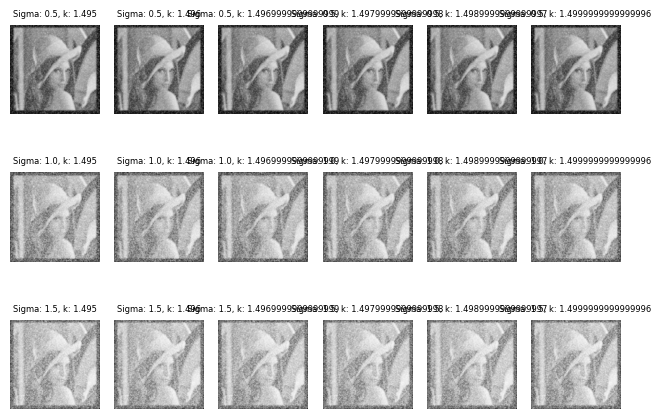

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Specify the k values
k_values = np.arange(1.495, 1.501, 0.001)
restored_images = []
for noisy_img in noisy_images:
    restored_img_list = []
    for k in k_values:
        restored_img = apply_wiener_filter(noisy_img, k)
        restored_img_list.append(restored_img)
    restored_images.append(restored_img_list)

# Display the restored images with corresponding labels
for i in range(len(sigma_values)):
    for j in range(len(k_values)):
        plt.subplot(len(sigma_values), len(k_values), i * len(k_values) + j + 1)
        plt.imshow(cv2.cvtColor(restored_images[i][j], cv2.COLOR_BGR2RGB))
        plt.title(f'Sigma: {sigma_values[i]}, k: {k_values[j]}', fontsize=6)
        plt.axis('off')

plt.tight_layout()
plt.show()


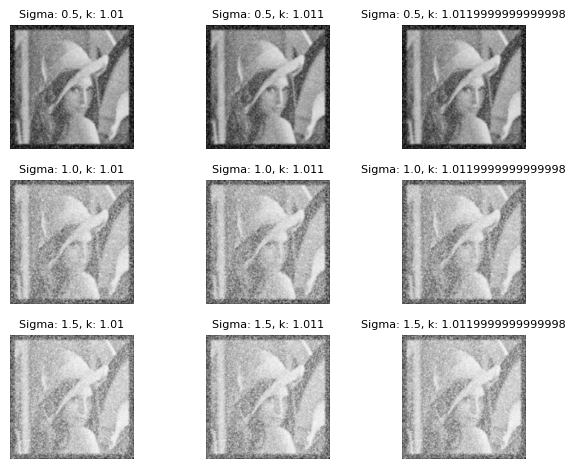

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Specify the k values
k_values = np.arange(1.01, 1.012, 0.001)
restored_images = []
for noisy_img in noisy_images:
    restored_img_list = []
    for k in k_values:
        restored_img = apply_wiener_filter(noisy_img, k)
        restored_img_list.append(restored_img)
    restored_images.append(restored_img_list)

# Display the restored images with corresponding labels
for i in range(len(sigma_values)):
    for j in range(len(k_values)):
        plt.subplot(len(sigma_values), len(k_values), i * len(k_values) + j + 1)
        plt.imshow(cv2.cvtColor(restored_images[i][j], cv2.COLOR_BGR2RGB))
        plt.title(f'Sigma: {sigma_values[i]}, k: {k_values[j]}', fontsize=8)
        plt.axis('off')

plt.tight_layout()
plt.show()


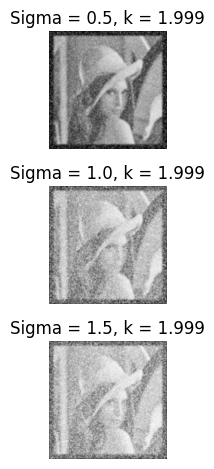

In [ ]:
k_values = np.arange(1.999, 2.0, 0.001)
restored_images = []
for noisy_img in noisy_images:
    restored_img_list = []
    for k in k_values:
        restored_img = apply_wiener_filter(noisy_img, k)
        restored_img_list.append(restored_img)
    restored_images.append(restored_img_list)

for i in range(len(sigma_values)):
    for j in range(len(k_values)):
        plt.subplot(len(sigma_values), len(k_values), i * len(k_values) + j + 1)
        plt.imshow(cv2.cvtColor(restored_images[i][j], cv2.COLOR_BGR2RGB))
        plt.title(f'Sigma = {sigma_values[i]}, k = {k_values[j]}')
        plt.axis('off')
plt.tight_layout()
plt.show()

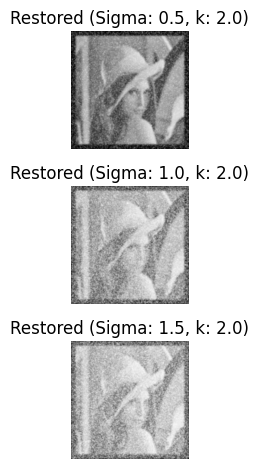

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of k values
k_values = np.arange(2.0, 2.001, 0.001)

# List to store restored images
restored_images = []

# Perform restoration for each noisy image
for noisy_img in noisy_images:
    restored_img_list = []
    for k in k_values:
        restored_img = apply_wiener_filter(noisy_img, k)
        restored_img_list.append(restored_img)
    restored_images.append(restored_img_list)

# Display the restored images
for i in range(len(sigma_values)):
    for j in range(len(k_values)):
        plt.subplot(len(sigma_values), len(k_values), i * len(k_values) + j + 1)
        plt.imshow(cv2.cvtColor(restored_images[i][j], cv2.COLOR_BGR2RGB))
        plt.title(f'Restored (Sigma: {sigma_values[i]}, k: {k_values[j]})')
        plt.axis('off')

plt.tight_layout()
plt.show()


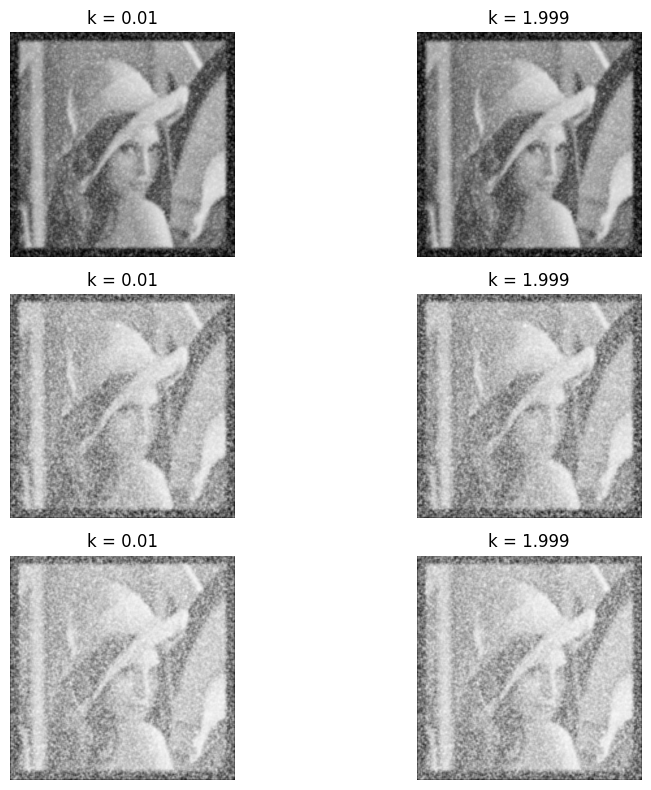

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the k values for comparison
k_values = np.array([0.01, 1.999])

# List to store restored images
restored_images = []

# Apply Wiener filter to each noisy image
for noisy_img in noisy_images:
    restored_img_list = []
    for k in k_values:
        restored_img = apply_wiener_filter(noisy_img, k)
        restored_img_list.append(restored_img)
    restored_images.append(restored_img_list)

# Create subplots to display the images
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

for i in range(3):
    for j in range(2):
        if j == 0:
            img = cv2.cvtColor(restored_images[i][0], cv2.COLOR_BGR2RGB)
            title = f'k = {k_values[0]:.2f}'
        else:
            img = cv2.cvtColor(restored_images[i][1], cv2.COLOR_BGR2RGB)
            title = f'k = {k_values[1]:.3f}'
        axes[i, j].imshow(img)
        axes[i, j].set_title(title)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()
